<a href="https://colab.research.google.com/github/mateusfugita/QuarentenaDados/blob/master/QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Lendo os dados do MovieLens

Vamos importar a biblioteca pandas e utilizá-la para ler uma base de dados e realizar uma análise de manipulação de dados.

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# lendo a documentação
?filmes

In [0]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_filmeId_1 = avaliacoes.query('filmeId==1')
avaliacoes_filmeId_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes_filmeId_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [0]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Plotagem de gráficos

Vamos utilizar o método ```.plot``` e, para realizar uma análise mais adequada, vamos alterar o parâmetro **kind** para plotar um histograma.

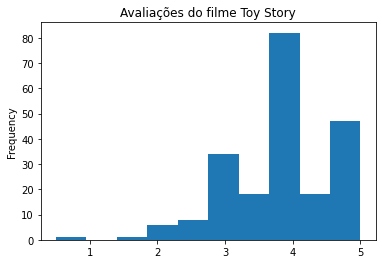

In [0]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist', title="Avaliações do filme Toy Story")

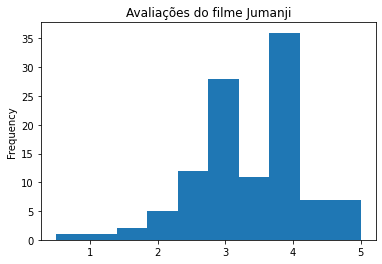

In [0]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist', title="Avaliações do filme Jumanji")

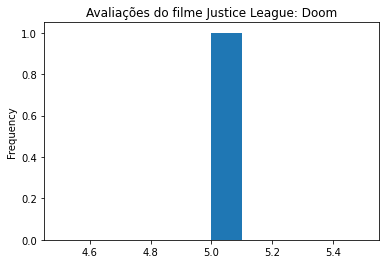

In [0]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist', title="Avaliações do filme Justice League: Doom")

# Desafios - Aula 1

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [0]:
filmes_sem_avaliacao = filmes_com_media[pd.isna(filmes_com_media['nota'])]
print('Filmes sem avaliação: ' + str(filmes_sem_avaliacao['filmeId'].count()))
filmes_sem_avaliacao

Filmes sem avaliação: 18


,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
filmes_com_media.rename(columns={'nota': 'nota_média'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
total_votos = avaliacoes.groupby('filmeId')['nota'].count()
total_votos.name = 'qtd_votos'
total_votos.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: qtd_votos, dtype: int64

In [0]:
filmes_com_media = filmes_com_media.join(total_votos, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota_média,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_com_media['nota_média'] = round(filmes_com_media['nota_média'], 2)
filmes_com_media.head()

,filmeId,titulo,generos,nota_média,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
filmes['generos'].str.get_dummies('|').sum().index

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

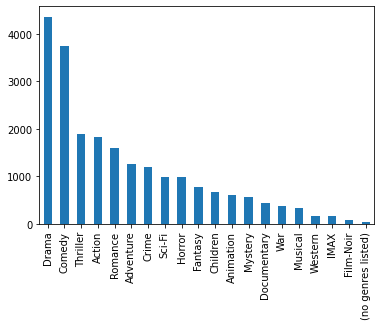

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


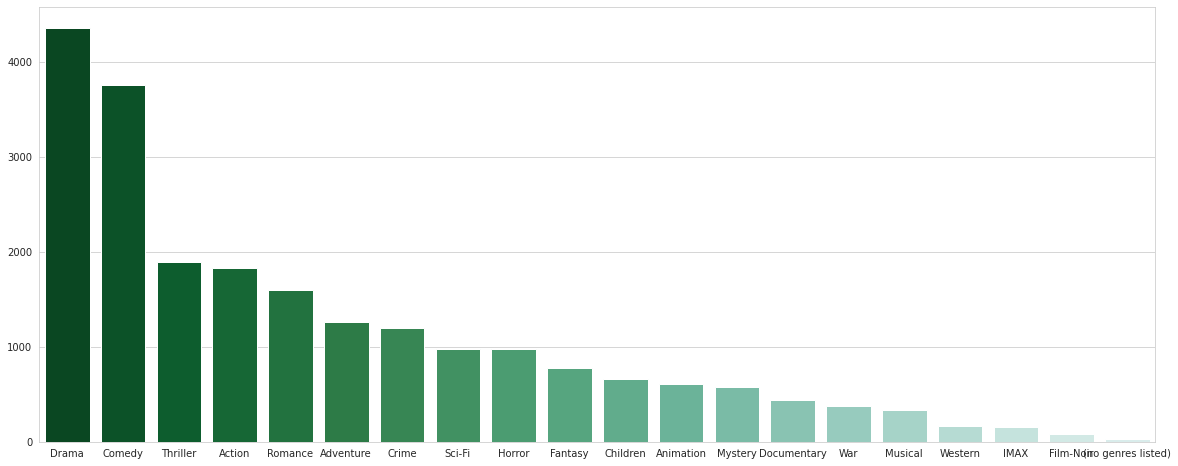

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero) + 4))
plt.show()

# Aula 2

3.9209302325581397


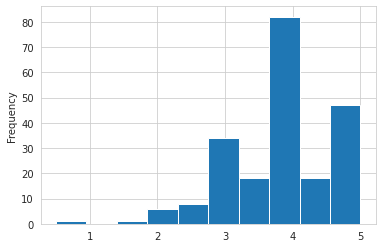

In [0]:
notas_do_filme_1 = avaliacoes.query('filmeId==1')['nota']
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


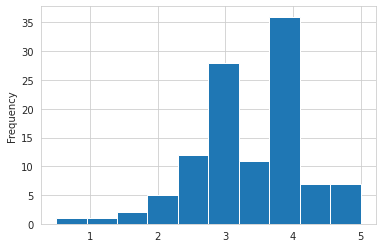

In [0]:
notas_do_filme_2 = avaliacoes.query('filmeId==2')['nota']
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')

In [0]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [0]:
filmes_com_media.sort_values('nota_média', ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_média,qtd_votos
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90,5.0
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90,48.0
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90,5.0
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90,62.0
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90,5.0
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90,70.0
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90,5.0
2894,3871,Shane (1953),Drama|Western,3.90,5.0
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90,41.0
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90,30.0


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

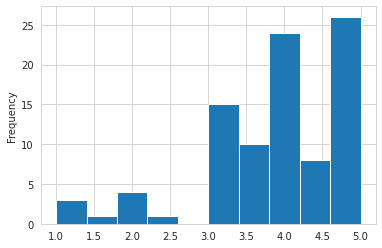

In [0]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

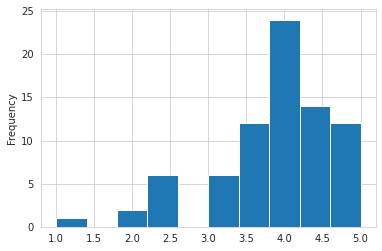

In [0]:
plot_filme(46578)

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

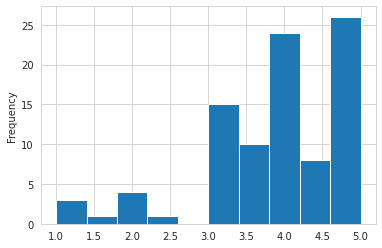

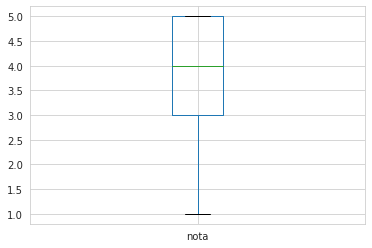

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(919)

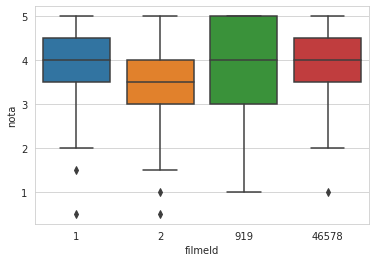

In [0]:
sns.boxplot(data=avaliacoes.query('filmeId in [1,2,919,46578]'), x='filmeId', y='nota')

# Desafios - Aula 2


##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

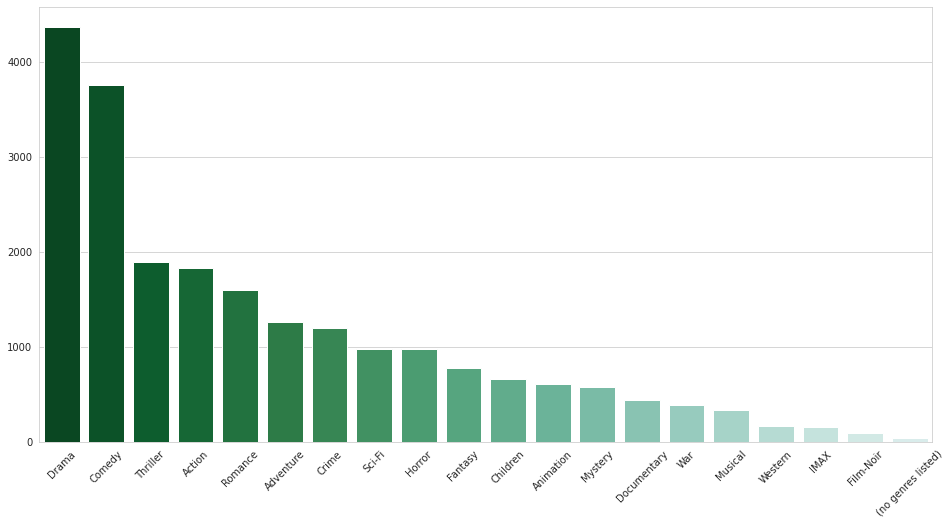

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
chart = sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero) + 4))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
filmes_com_media.sort_values('nota_média', ascending=False)[2800:2802]

,filmeId,titulo,generos,nota_média,qtd_votos
2782,3723,Hamlet (1990),Drama,3.8,5.0
1472,1997,"Exorcist, The (1973)",Horror|Mystery,3.8,53.0


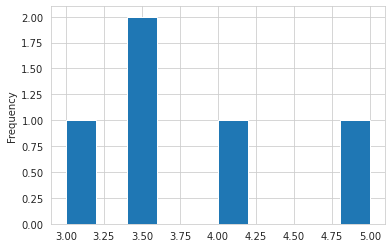

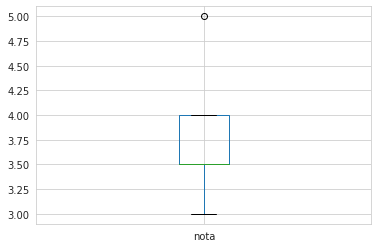

count    5.000000
mean     3.800000
std      0.758288
min      3.000000
25%      3.500000
50%      3.500000
75%      4.000000
max      5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(3723)

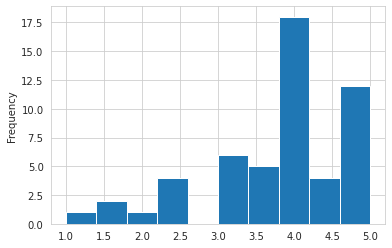

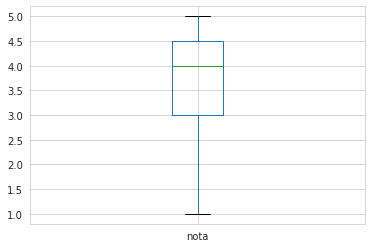

count    53.000000
mean      3.801887
std       1.006420
min       1.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(1997)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

Text(0.5, 0, 'titulo')

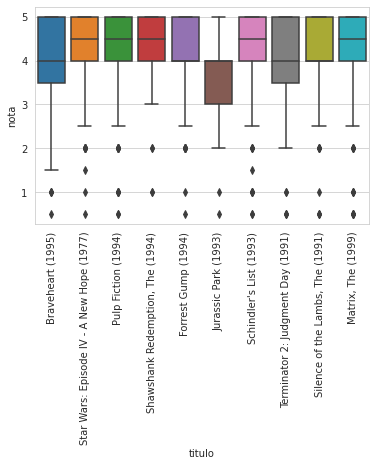

In [0]:
filmes_com_mais_votos = filmes_com_media.sort_values('qtd_votos', ascending=False).head(10)
filmeIds = filmes_com_mais_votos['filmeId']
box = sns.boxplot(data=avaliacoes.query(f'filmeId in @filmeIds'), x='filmeId', y='nota')
box.set_xticklabels(filmes_com_media.query('filmeId in @filmeIds')['titulo'], rotation=90)
box.set_xlabel('titulo')

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

Text(0.5, 0, 'titulo')

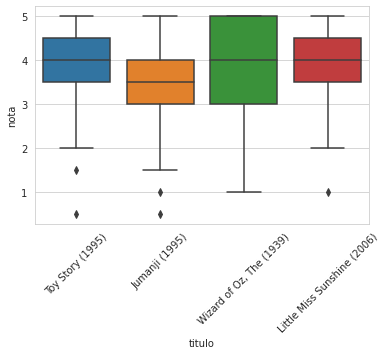

In [0]:
box = sns.boxplot(data=avaliacoes.query('filmeId in [1,2,919,46578]'), x='filmeId', y='nota')
box.set_xticklabels(filmes_com_media.query('filmeId in [1,2,919,46578]')['titulo'], rotation=45)
box.set_xlabel('titulo')

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
filmes_com_media_5 = filmes_com_media.query('nota_média==5.0').sort_values('qtd_votos', ascending=False).head(1)
filmes_com_media_3 = filmes_com_media.query('nota_média==3.0').sort_values('qtd_votos', ascending=False).head(1)
filmes_com_media_0 = filmes_com_media.query('nota_média==0.5').sort_values('qtd_votos', ascending=False).head(1)

In [0]:
def info_filme(filme):
  print(filme['titulo'].values[0])
  id = filme['filmeId'].values[0]
  moda = avaliacoes.query('filmeId==@id')['nota'].mode().values[0]
  media = avaliacoes.query('filmeId==@id')['nota'].mean()
  mediana = avaliacoes.query('filmeId==@id')['nota'].median()
  print(f'Moda: {moda}')
  print(f'Média: {media}')
  print(f'Mediana: {mediana}')
  print('Votos: ' + str(filme['qtd_votos'].values[0]))

In [0]:
info_filme(filmes_com_media_5)

Lamerica (1994)
Moda: 5.0
Média: 5.0
Mediana: 5.0
Votos: 2.0


In [0]:
info_filme(filmes_com_media_3)

Home Alone (1990)
Moda: 3.0
Média: 2.9956896551724137
Mediana: 3.0
Votos: 116.0


In [0]:
info_filme(filmes_com_media_0)

Cyborg (1989)
Moda: 0.5
Média: 0.5
Mediana: 0.5
Votos: 2.0


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


In [0]:
def plot_filme_lado_a_lado(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(10, 5)
  notas_do_filme.plot(kind='hist', ax=ax[0])
  notas_do_filme.plot.box(ax=ax[1])
  plt.show()

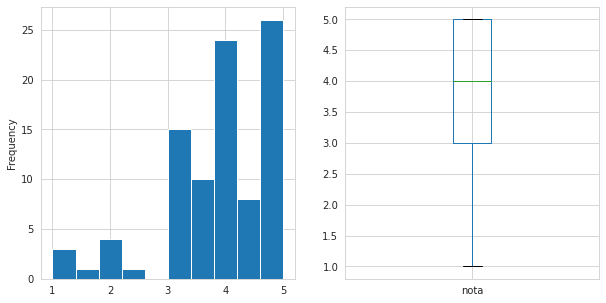

In [0]:
plot_filme_lado_a_lado(919)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
filtro_anos = filmes_com_media['titulo'].str.endswith(')')
filmes_com_ano = filmes_com_media[filtro_anos]
filmes_com_ano['ano'] = filmes_com_ano['titulo'].str[-5:-1:1]
filmes_com_ano.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,filmeId,titulo,generos,nota_média,qtd_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0,1995


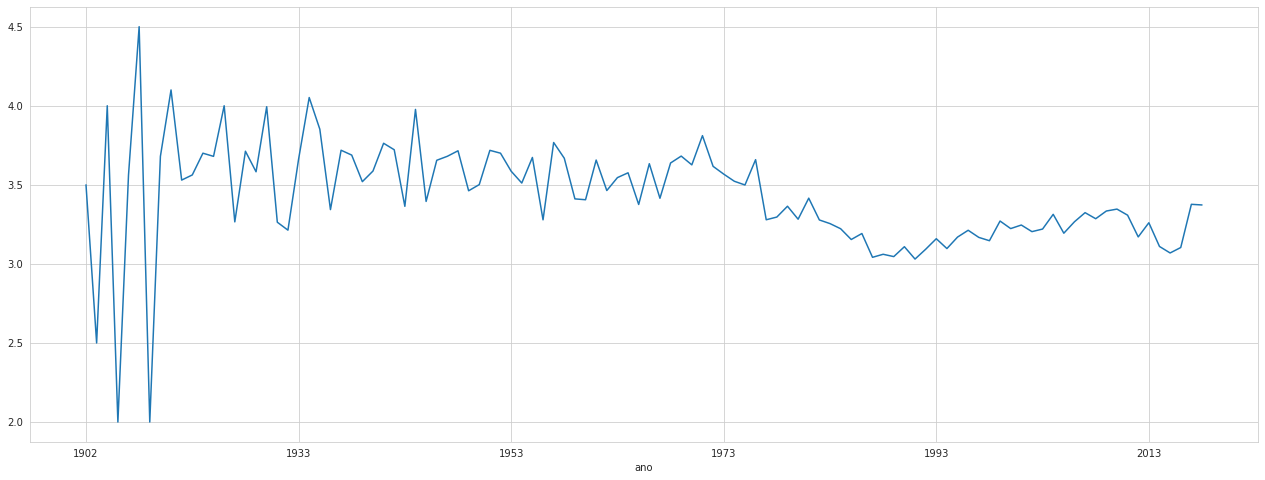

In [0]:
nota_media_por_ano = filmes_com_ano.groupby('ano')['nota_média'].mean()
plt.figure(figsize=(22,8))
nota_media_por_ano.plot()

# Aula 3

## Leitura de dados do IMDB

In [0]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
imdb['director_name'].value_counts()

Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
                     ..
Justin Dillon         1
Ed Gass-Donnelly      1
Martin Koolhoven      1
Vincente Minnelli     1
Danny Provenzano      1
Name: director_name, Length: 2398, dtype: int64

In [0]:
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

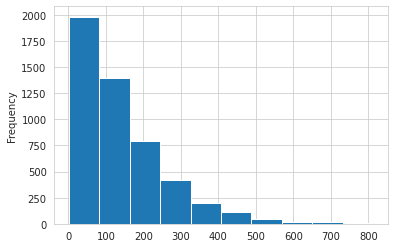

In [0]:
imdb['num_critic_for_reviews'].plot(kind='hist')

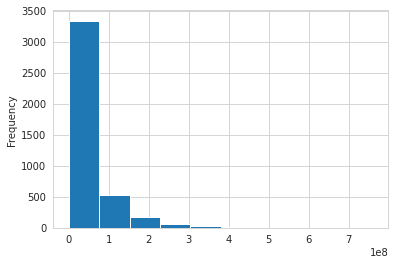

In [0]:
imdb['gross'].plot(kind='hist')

In [0]:
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [0]:
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4620,Color,Mikel Rueda,9.0,96.0,0.0,0.0,Germán Alcarazu,90.0,NaN,Drama|Romance,Álex Angulo,Hidden Away,955,90,Joseba Ugalde,0.0,best friend|deportation|moroccan|unrequited lo...,http://www.imdb.com/title/tt3289362/?ref_=fn_t...,7.0,Spanish,Spain,Unrated,NaN,2014.0,0.0,7.2,2.35,68
4448,Color,Russell Friedenberg,27.0,93.0,9.0,485.0,Glen Powell,708.0,NaN,Action|Horror|Thriller,Rudy Youngblood,Wind Walkers,133,2870,Kiowa Gordon,NaN,after dark horrorfest,http://www.imdb.com/title/tt1236254/?ref_=fn_t...,2.0,English,USA,R,2000000.0,2015.0,571.0,3.6,NaN,135
1068,Color,Jimmy Hayward,178.0,81.0,39.0,364.0,Billy Blair,13000.0,10539414.0,Action|Drama|Fantasy|Thriller|Western,Michael Fassbender,Jonah Hex,45729,14619,Julia Jones,1.0,confederate|death|independence day|military|te...,http://www.imdb.com/title/tt1075747/?ref_=fn_t...,176.0,English,USA,PG-13,47000000.0,2010.0,541.0,4.7,2.35,0
1860,Color,Michael Cohn,22.0,100.0,2.0,512.0,Chris Bauer,642.0,NaN,Fantasy|Horror,David Conrad,Snow White: A Tale of Terror,8118,2170,Monica Keena,2.0,apple|miner|mirror|necromancy|woods,http://www.imdb.com/title/tt0119227/?ref_=fn_t...,69.0,English,USA,R,26000000.0,1997.0,638.0,6.3,1.85,0
490,Color,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Action|Adventure|Drama|Thriller,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,bear|billionaire|crash|survival tactics|wilder...,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997.0,1000.0,6.9,2.35,0
4444,Color,Frank Lotito,NaN,102.0,5.0,259.0,Jake Busey,3000.0,NaN,Comedy|Drama|Family,Brighton Sharbino,Growing Up Smith,108,4320,Tim Guinee,NaN,adolescence|girl next door|growing vegetables|...,http://www.imdb.com/title/tt1105355/?ref_=fn_t...,1.0,English,USA,PG-13,2000000.0,2015.0,660.0,8.2,1.85,232
1530,Color,David R. Ellis,285.0,105.0,160.0,491.0,Kenan Thompson,852.0,34014398.0,Action|Adventure|Crime|Drama|Thriller,Lin Shaye,Snakes on a Plane,115649,2604,Rachel Blanchard,0.0,baby rattle|famous line|murder|passenger|snake,http://www.imdb.com/title/tt0417148/?ref_=fn_t...,1033.0,English,Germany,R,33000000.0,2006.0,521.0,5.6,2.35,4000
2936,Color,Nima Nourizadeh,229.0,93.0,166.0,281.0,Kirby Bliss Blanton,971.0,54724272.0,Comedy|Crime,Dax Flame,Project X,157051,2043,Oliver Cooper,0.0,birthday party|high school|high school senior|...,http://www.imdb.com/title/tt1636826/?ref_=fn_t...,261.0,English,USA,R,12000000.0,2012.0,329.0,6.7,1.85,29000
1964,Color,Ringo Lam,50.0,101.0,17.0,218.0,Zach Grenier,900.0,14095303.0,Action|Crime|Mystery|Romance|Thriller,Natasha Henstridge,Maximum Risk,15814,1634,Paul Ben-Victor,1.0,fbi|fbi agent|mafia|russian mafia|twin,http://www.imdb.com/title/tt0117011/?ref_=fn_t...,68.0,English,USA,R,25000000.0,1996.0,246.0,5.4,2.35,503
3673,Color,Clint Eastwood,72.0,105.0,16000.0,258.0,Richard Bull,16000.0,NaN,Mystery|Western,Clint Eastwood,High Plains Drifter,36381,17599,John Hillerman,0.0,gravestone|gunfighter|outlaw|revenge|small town,http://www.imdb.com/title/tt0068699/?ref_=fn_t...,169.0,English,USA,R,5500000.0,1973.0,742.0,7.6,2.35,0


In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [0]:
color_or_bw['color_0_or_1'] = (color_or_bw['color'] == 'Color') * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_or_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [0]:
color_or_bw['color_0_or_1'].value_counts()

1    4815
0     209
Name: color_0_or_1, dtype: int64

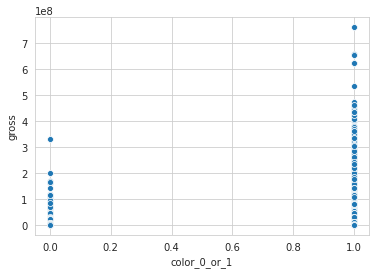

In [0]:
sns.scatterplot(data=color_or_bw, x='color_0_or_1', y='gross')

In [0]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

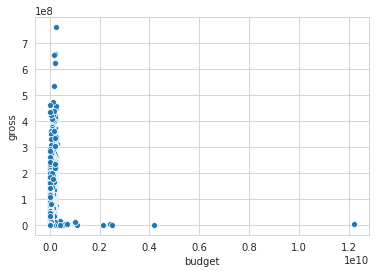

In [0]:
budget_gross = imdb[['budget', 'gross']].dropna()
sns.scatterplot(data=budget_gross, x='budget', y='gross')

In [0]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
imdb = imdb.drop_duplicates()

In [0]:
imdb_usa = imdb.query("country =='USA'")
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


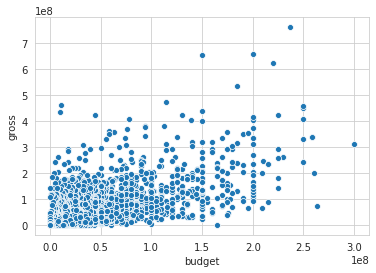

In [0]:
budget_gross = imdb_usa[['budget', 'gross']].dropna()
sns.scatterplot(data=budget_gross, x='budget', y='gross')

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


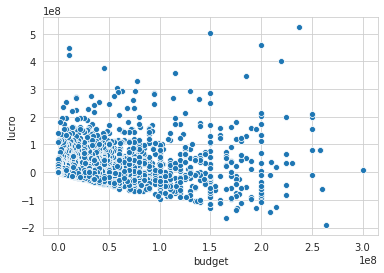

In [0]:
# lucro / prejuizo
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query('budget > 0 | gross > 0')[['budget', 'lucro']].dropna()
sns.scatterplot(data=budget_gross, x='budget', y='lucro')

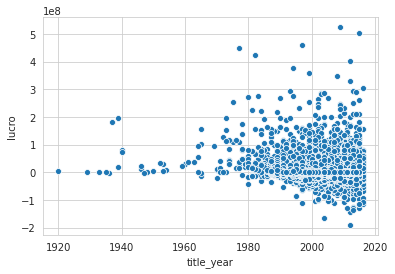

In [0]:
budget_gross = imdb_usa.query('budget > 0 | gross > 0')[['title_year', 'lucro']].dropna()
sns.scatterplot(data=budget_gross, x='title_year', y='lucro')

In [0]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [0]:
gross_director = imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on='director_name')
gross_director.columns = ['dindin', 'filmes_irmaos']
gross_director.reset_index()
gross_director.head()

,dindin,filmes_irmaos
director_name,,
James Cameron,760505847.0,6.0
Gore Verbinski,309404152.0,7.0
Christopher Nolan,448130642.0,8.0
Andrew Stanton,73058679.0,3.0
Sam Raimi,336530303.0,11.0


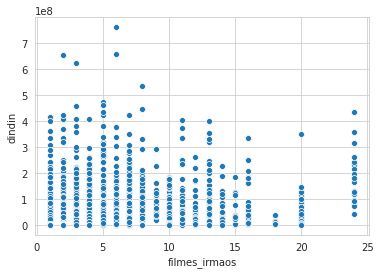

In [0]:
sns.scatterplot(data=gross_director, x='filmes_irmaos', y='dindin')

## Análise de correlações de dados

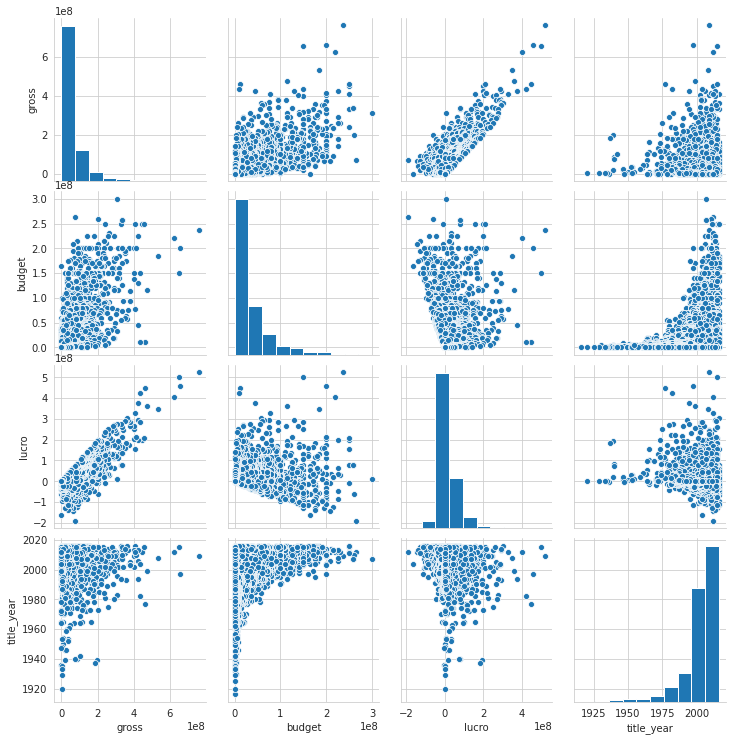

In [0]:
sns.pairplot(data=imdb_usa[['gross', 'budget', 'lucro', 'title_year']])

In [0]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


# Desafios - Aula 3

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

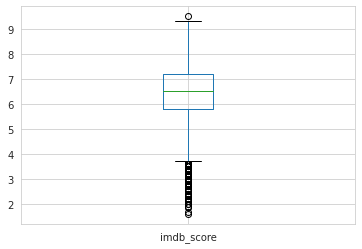

In [0]:
imdb.query("color=='Color'")['imdb_score'].plot.box()

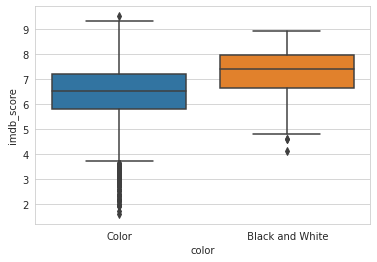

In [0]:
sns.boxplot(data=imdb.query("color in ['Color', ' Black and White']"), x='color', y='imdb_score')

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [0]:
imdb_usa.sort_values('lucro').head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

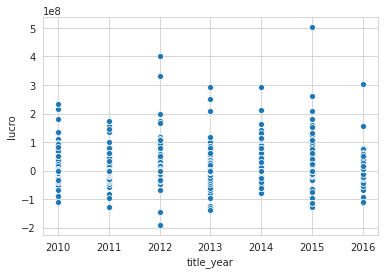

In [0]:
sns.scatterplot(data=imdb_usa.query('title_year >= 2010'), x='title_year', y='lucro')

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [0]:
imdb_usa.query('title_year<=1940 & lucro > 0').sort_values('lucro', ascending=False)['movie_title']

3970                 Gone with the Wind 
4449    Snow White and the Seven Dwarfs 
1143                          Pinocchio 
4225                           Fantasia 
4157                   The Wizard of Oz 
4958     Over the Hill to the Poorhouse 
4812                The Broadway Melody 
4706                            Top Hat 
4786                        42nd Street 
Name: movie_title, dtype: object

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

Index(['Woody Allen'], dtype='object', name='director_name')


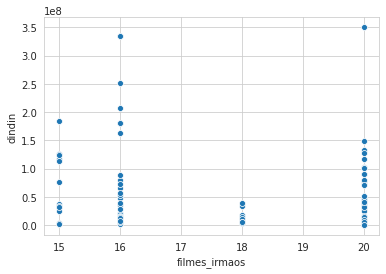

In [0]:
print(gross_director.query('filmes_irmaos == 18').dropna().index.unique())
sns.scatterplot(data=gross_director.query('filmes_irmaos >=15 & filmes_irmaos <= 20'), x='filmes_irmaos', y='dindin')

## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

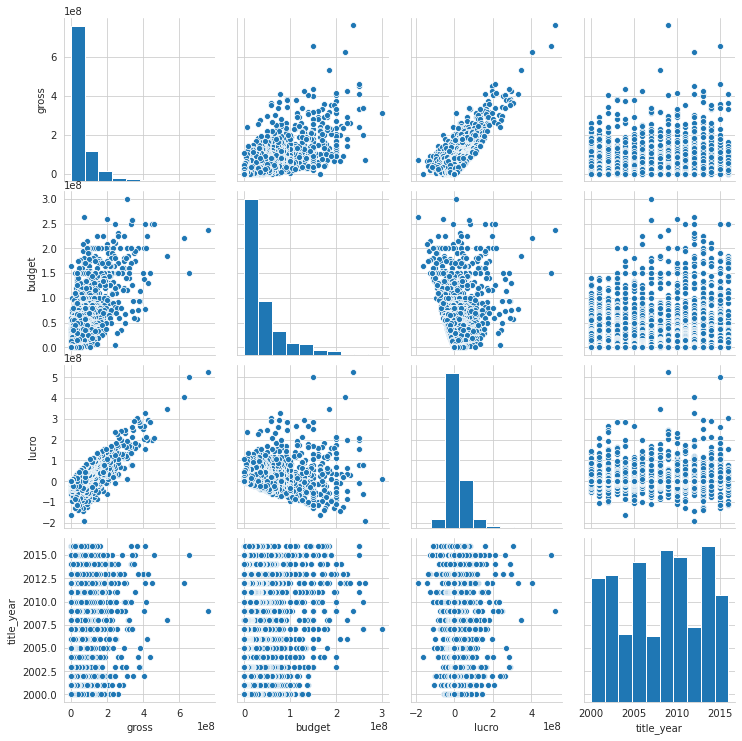

In [0]:
sns.pairplot(data=imdb_usa.query('title_year >= 2000')[['gross', 'budget', 'lucro', 'title_year']])

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
imdb_usa.query('title_year >= 2000')[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [0]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year', 'duration', 'imdb_score']].corr()

,gross,budget,lucro,title_year,duration,imdb_score
gross,1.000000,0.645673,0.797037,0.034827,0.286503,0.258948
budget,0.645673,1.000000,0.053455,0.229453,0.315569,0.078936
lucro,0.797037,0.053455,1.000000,-0.123035,0.128253,0.294858
title_year,0.034827,0.229453,-0.123035,1.000000,-0.124484,-0.227569
duration,0.286503,0.315569,0.128253,-0.124484,1.000000,0.275720
imdb_score,0.258948,0.078936,0.294858,-0.227569,0.275720,1.000000
